# **Computational Drug Discovery - SOAT-2 : Exploratory Data Analysis Part 02**

Khalid El Akri

[*'Chem Code Professor' YouTube channel*](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the Bindingdb bioactivity data.

In this **Part 02**, we will be performing Descriptor Calculation and Exploratory Data Analysis. Let get started! Shall we ;)

---

## **Install rdkit**

In [1]:
! pip install rdkit

## **Load SOAT-2 bioactivity data**

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('final_output.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [11]:
df_lipinski = lipinski(df.mol_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,675.731,5.05780,1.0,12.0
1,670.715,4.92088,1.0,12.0
2,670.715,4.92088,1.0,12.0
3,659.732,5.35762,1.0,11.0
4,663.695,5.18830,1.0,11.0
...,...,...,...,...
213,388.416,3.67350,5.0,7.0
214,248.322,2.70470,1.0,3.0
215,295.426,5.65260,1.0,1.0
216,295.426,5.65260,1.0,1.0


In [13]:
df

,mol_bdID,mol_smiles,bioactivity_class,mol_IC50
0,51053294,COc1ccc(C(=O)O[C@H]2C[C@H]3[C@](C)(COC(C)=O)[C...,active,0.9
1,51068473,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,0.9
2,51053301,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,0.9
3,51053293,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C)c...,active,0.9
4,51053292,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3cccc(F)...,active,1.0
...,...,...,...,...
213,51346963,CC(C)=CC=C(OC(=O)CC(C)(C)O)c1cc(O)c2c(O)ccc(O)...,inactive,187300.0
214,330437,C=C1CCC[C@]2(C)C[C@]3(O)OC(=O)C(C)=C3C[C@@H]12,inactive,230000.0
215,50855129,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,230000.0
216,330438,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,414000.0


In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,mol_bdID,mol_smiles,bioactivity_class,mol_IC50,MW,LogP,NumHDonors,NumHAcceptors
0,51053294,COc1ccc(C(=O)O[C@H]2C[C@H]3[C@](C)(COC(C)=O)[C...,active,0.9,675.731,5.05780,1.0,12.0
1,51068473,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,0.9,670.715,4.92088,1.0,12.0
2,51053301,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,0.9,670.715,4.92088,1.0,12.0
3,51053293,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C)c...,active,0.9,659.732,5.35762,1.0,11.0
4,51053292,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3cccc(F)...,active,1.0,663.695,5.18830,1.0,11.0
...,...,...,...,...,...,...,...,...
213,51346963,CC(C)=CC=C(OC(=O)CC(C)(C)O)c1cc(O)c2c(O)ccc(O)...,inactive,187300.0,388.416,3.67350,5.0,7.0
214,330437,C=C1CCC[C@]2(C)C[C@]3(O)OC(=O)C(C)=C3C[C@@H]12,inactive,230000.0,248.322,2.70470,1.0,3.0
215,50855129,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,230000.0,295.426,5.65260,1.0,1.0
216,330438,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,414000.0,295.426,5.65260,1.0,1.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``mol_IC50`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``mol_IC50`` column and create a new ``pIC50`` column

In [16]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['mol_IC50_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='mol_IC50_norm')
        
    return x

#### Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [17]:
df_combined.mol_IC50.describe()

count       218.000000
mean      21076.343119
std       54043.479575
min           0.900000
25%          19.000000
50%         629.500000
75%       11125.000000
max      414000.000000
Name: mol_IC50, dtype: float64

In [18]:
-np.log10( (10**-9)* 100000000 )

1.0

In [19]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [20]:
def norm_value(input):
    norm = []

    for i in input['mol_IC50']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['mol_IC50_norm'] = norm
    x = input.drop(labels='mol_IC50', axis=1)
        
    return x

#### We will first apply the norm_value() function so that the values in the standard value of mol_IC50 column is normalized.

In [21]:
df_norm = norm_value(df_combined)
df_norm

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,mol_IC50_norm
0,51053294,COc1ccc(C(=O)O[C@H]2C[C@H]3[C@](C)(COC(C)=O)[C...,active,675.731,5.05780,1.0,12.0,0.9
1,51068473,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,670.715,4.92088,1.0,12.0,0.9
2,51053301,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,670.715,4.92088,1.0,12.0,0.9
3,51053293,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C)c...,active,659.732,5.35762,1.0,11.0,0.9
4,51053292,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3cccc(F)...,active,663.695,5.18830,1.0,11.0,1.0
...,...,...,...,...,...,...,...,...
213,51346963,CC(C)=CC=C(OC(=O)CC(C)(C)O)c1cc(O)c2c(O)ccc(O)...,inactive,388.416,3.67350,5.0,7.0,187300.0
214,330437,C=C1CCC[C@]2(C)C[C@]3(O)OC(=O)C(C)=C3C[C@@H]12,inactive,248.322,2.70470,1.0,3.0,230000.0
215,50855129,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,295.426,5.65260,1.0,1.0,230000.0
216,330438,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,295.426,5.65260,1.0,1.0,414000.0


In [22]:
df_norm.mol_IC50_norm.describe()

count       218.000000
mean      21076.343119
std       54043.479575
min           0.900000
25%          19.000000
50%         629.500000
75%       11125.000000
max      414000.000000
Name: mol_IC50_norm, dtype: float64

In [23]:
df_final = pIC50(df_norm)
df_final

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,51053294,COc1ccc(C(=O)O[C@H]2C[C@H]3[C@](C)(COC(C)=O)[C...,active,675.731,5.05780,1.0,12.0,9.045757
1,51068473,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,670.715,4.92088,1.0,12.0,9.045757
2,51053301,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,670.715,4.92088,1.0,12.0,9.045757
3,51053293,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C)c...,active,659.732,5.35762,1.0,11.0,9.045757
4,51053292,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3cccc(F)...,active,663.695,5.18830,1.0,11.0,9.000000
...,...,...,...,...,...,...,...,...
213,51346963,CC(C)=CC=C(OC(=O)CC(C)(C)O)c1cc(O)c2c(O)ccc(O)...,inactive,388.416,3.67350,5.0,7.0,3.727462
214,330437,C=C1CCC[C@]2(C)C[C@]3(O)OC(=O)C(C)=C3C[C@@H]12,inactive,248.322,2.70470,1.0,3.0,3.638272
215,50855129,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,295.426,5.65260,1.0,1.0,3.638272
216,330438,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,295.426,5.65260,1.0,1.0,3.383000


In [24]:
df_final.pIC50.describe()

count    218.000000
mean       6.275259
std        1.551436
min        3.383000
25%        4.954477
50%        6.201065
75%        7.721246
max        9.045757
Name: pIC50, dtype: float64

In [25]:
df_final.to_csv('soat_2_bioa_data_preprocessed.csv', index=False)

In [26]:
! ls -l

total 8720
-rw-r--r--  1 akrikhalid  staff   394873 May 29 01:30 Output3_Sterol O-acyltransferase 2 inhibitors 219.csv
-rw-r--r--  1 akrikhalid  staff   262598 May 29 02:55 Sterol O-acyltransferase 2 inhibitors 219 Part 01.ipynb
-rw-r--r--  1 akrikhalid  staff    35173 May 29 09:44 Sterol O-acyltransferase 2 inhibitors 219 Part 02.ipynb
-rw-r--r--  1 akrikhalid  staff   394873 May 29 00:27 Sterol O-acyltransferase 2 inhibitors 219.csv
-rw-r--r--@ 1 akrikhalid  staff  1525829 May 28 23:19 Sterol O-acyltransferase 2 inhibitors 219.sdf
-rw-r--r--@ 1 akrikhalid  staff   382470 May 29 00:20 Sterol O-acyltransferase 2 inhibitors 219.tsv
-rw-r--r--  1 akrikhalid  staff    25632 May 29 02:41 final_output.csv
-rw-r--r--  1 akrikhalid  staff    21055 May 29 01:32 output2_Sterol O-acyltransferase 2 inhibitors 219.csv
-rw-r--r--  1 akrikhalid  staff   394873 May 29 01:44 output4_Sterol O-acyltransferase 2 inhibitors 219.csv
-rw-r--r--  1 akrikhalid  staff   375277 May 29 00:31 output_Sterol O-acyl

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [27]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,51053294,COc1ccc(C(=O)O[C@H]2C[C@H]3[C@](C)(COC(C)=O)[C...,active,675.731,5.05780,1.0,12.0,9.045757
1,51068473,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,670.715,4.92088,1.0,12.0,9.045757
2,51053301,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C#N...,active,670.715,4.92088,1.0,12.0,9.045757
3,51053293,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3ccc(C)c...,active,659.732,5.35762,1.0,11.0,9.045757
4,51053292,CC(=O)OC[C@@]1(C)[C@@H]2C[C@H](OC(=O)c3cccc(F)...,active,663.695,5.18830,1.0,11.0,9.000000
...,...,...,...,...,...,...,...,...
213,51346963,CC(C)=CC=C(OC(=O)CC(C)(C)O)c1cc(O)c2c(O)ccc(O)...,inactive,388.416,3.67350,5.0,7.0,3.727462
214,330437,C=C1CCC[C@]2(C)C[C@]3(O)OC(=O)C(C)=C3C[C@@H]12,inactive,248.322,2.70470,1.0,3.0,3.638272
215,50855129,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,295.426,5.65260,1.0,1.0,3.638272
216,330438,CCCCCCCC(=O)Nc1ccccc1-c1ccccc1,inactive,295.426,5.65260,1.0,1.0,3.383000


#### Now we have only 177 entries instead of 219 entries 

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [29]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

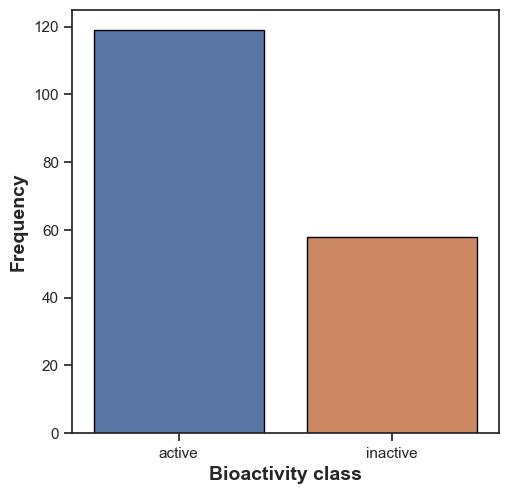

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

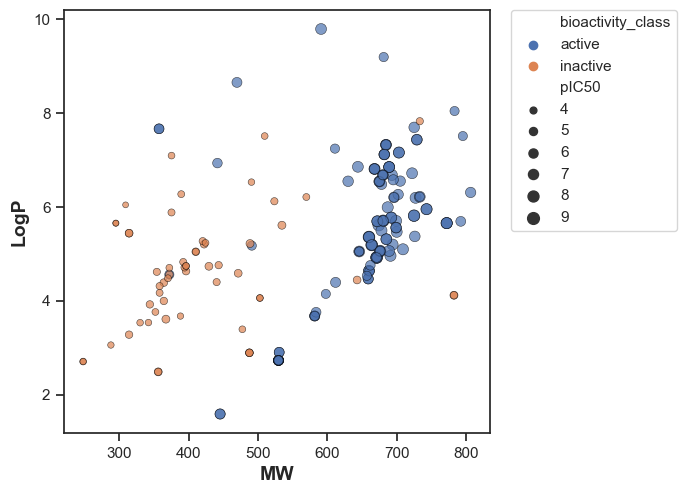

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

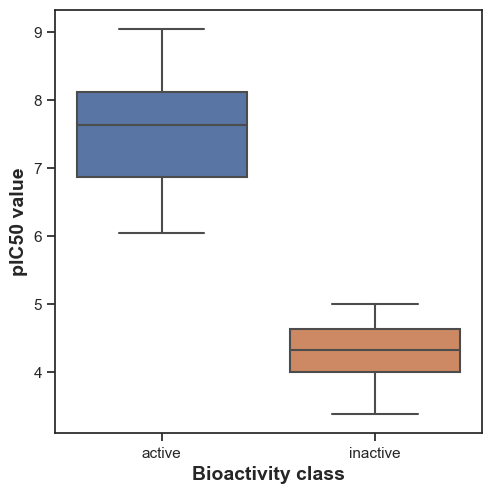

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [33]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [34]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6902.0,4.056908e-27,0.05,Different distribution (reject H0)


#### **MW**

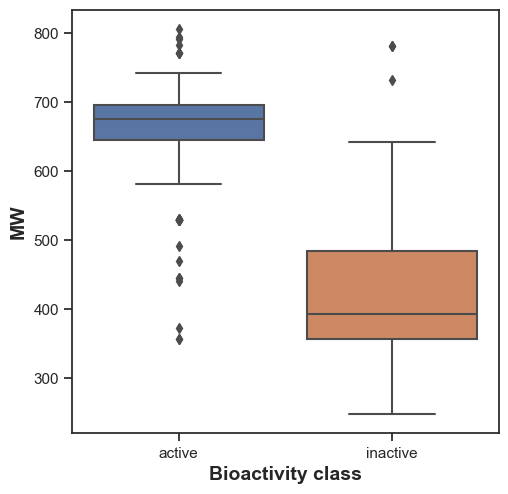

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [36]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6346.0,1.467806e-19,0.05,Different distribution (reject H0)


#### **LogP**

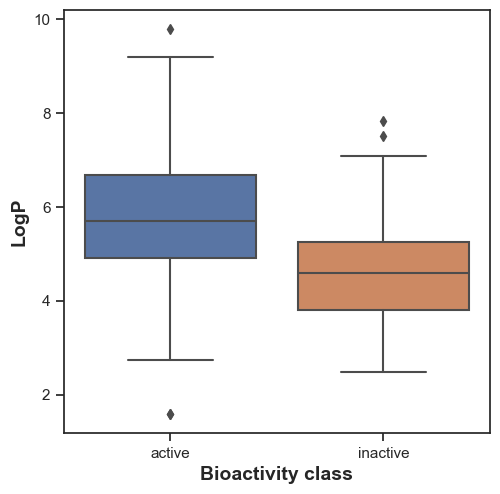

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4971.5,0.000002,0.05,Different distribution (reject H0)


#### **NumHDonors**

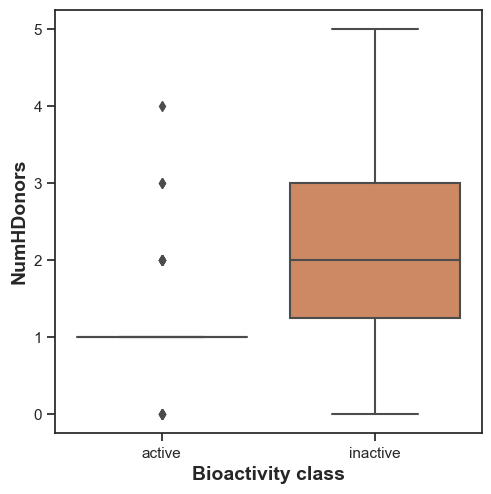

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [40]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1116.5,2.901293e-18,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

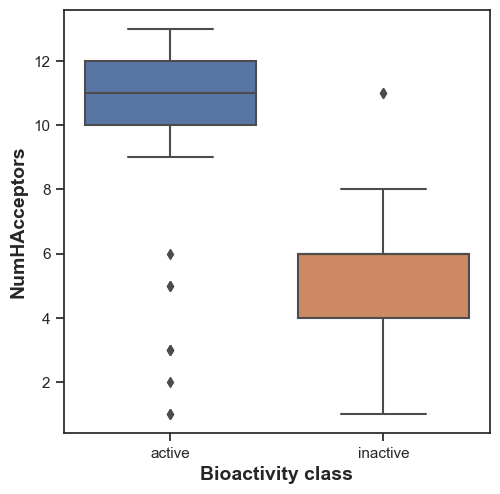

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [42]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6387.5,1.386802e-20,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

In [43]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: Output3_Sterol O-acyltransferase 2 inhibitors 219.csv (deflated 89%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: output2_Sterol O-acyltransferase 2 inhibitors 219.csv (deflated 89%)
  adding: plot_MW.pdf (deflated 38%)
  adding: final_output.csv (deflated 86%)
  adding: soat_2_bioa_data_preprocessed.csv (deflated 82%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: Sterol O-acyltransferase 2 inhibitors 219.csv (deflated 89%)
  adding: output_Sterol O-acyltransferase 2 inhibitors 219.csv (deflated 90%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: output4_Sterol O-acyltransferase 2 inhibitors 219.csv (deflated 89%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 12%)
  addin